In [110]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [23]:
def import_csv_data(filename: str):
    with open(filename, "r") as file:
        contents = file.readlines()

    data = np.array([line.removesuffix("\n").split(",") for line in contents[1:]])
    classifiers = list(np.unique(data[:, -1]))
    data = np.c_[[list(map(float, line)) for line in data[:, :-1]], [classifiers.index(category) for category in data[:, -1]]]
    return data

In [151]:
data_file = "Raisin_Dataset.csv"
data = import_csv_data(data_file)

training_num = 850
testing = data[training_num: ]
data = data[:training_num]

print(data, len(data))

[[8.75240000e+04 4.42246011e+02 2.53291155e+02 ... 7.58650579e-01
  1.18404000e+03 1.00000000e+00]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 ... 6.84129570e-01
  1.12178600e+03 1.00000000e+00]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 ... 6.37612812e-01
  1.20857500e+03 1.00000000e+00]
 ...
 [1.68269000e+05 6.14380432e+02 3.53466300e+02 ... 7.56241377e-01
  1.64145600e+03 0.00000000e+00]
 [9.93330000e+04 4.22876940e+02 3.02209573e+02 ... 7.20765368e-01
  1.19134800e+03 0.00000000e+00]
 [1.02722000e+05 4.16898937e+02 3.17542803e+02 ... 7.24419777e-01
  1.26198800e+03 0.00000000e+00]] 850


In [101]:
X_train = data[:, :-1]
y_train = data[:, -1]

features = ["Area", "Major Axis Length", "Minor Axis Length", "Eccentricity", "Convex Area", "Extent", "Perimeter", "Class"]

highlight = "\033[0;32;40m"
highlight_2 = "\033[0;33;48m"
normal = "\033[0;37;48m"

print(X_train)
print(y_train)

[[8.75240000e+04 4.42246011e+02 2.53291155e+02 ... 9.05460000e+04
  7.58650579e-01 1.18404000e+03]
 [7.51660000e+04 4.06690687e+02 2.43032436e+02 ... 7.87890000e+04
  6.84129570e-01 1.12178600e+03]
 [9.08560000e+04 4.42267048e+02 2.66328318e+02 ... 9.37170000e+04
  6.37612812e-01 1.20857500e+03]
 ...
 [1.68269000e+05 6.14380432e+02 3.53466300e+02 ... 1.73527000e+05
  7.56241377e-01 1.64145600e+03]
 [9.93330000e+04 4.22876940e+02 3.02209573e+02 ... 1.01942000e+05
  7.20765368e-01 1.19134800e+03]
 [1.02722000e+05 4.16898937e+02 3.17542803e+02 ... 1.07169000e+05
  7.24419777e-01 1.26198800e+03]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [65]:
def z_score_normalization(X_matrix):
    features_mean = np.mean(X_matrix, axis = 0)
    features_std_dev = np.std(X_matrix, axis = 0)

    normalized_X_matrix = (X_matrix - features_mean) / features_std_dev
    return normalized_X_matrix

In [130]:
def logistic_regression_probability(X_set, W_set, b):
    log_odds = np.dot(W_set, X_set) + b
    return 1 / (1 + np.exp(-log_odds))

In [131]:
def calculate_logistic_loss(X_set, y, W_set, b):
    target_1 = y * (-np.log(logistic_regression_probability(X_set, W_set, b)))
    target_0 = (1 - y) * (-np.log(1 - logistic_regression_probability(X_set, W_set, b)))

    return target_0 + target_1

In [33]:
def calculate_cost(X_matrix, y_set, W_set, b):
    m = X_matrix.shape[0]

    predictions = 1 / (1 + np.exp(-(X_matrix @ W_set + b)))
    losses = y_set * -np.log(predictions) + (1 - y_set) * -np.log(1 - predictions)

    return np.sum(losses) / m

In [35]:
def calculate_gradient(X_matrix, y_set, W_set, b):
    m = X_matrix.shape[0]

    predictions = 1 / (1 + np.exp(-(X_matrix @ W_set + b)))
    errors = predictions - y_set

    dj_dW = (X_matrix.T @ errors) / m
    dj_db = np.sum(errors) / m

    return dj_dW, dj_db

In [106]:
def gradient_descent(X_matrix, y_set, W_set, b, alpha, num_iters, display_logs = True):
    iteration_history = [0]
    cost_history = [calculate_cost(X_matrix, y_set, W_set, b)]

    for iteration in range(num_iters):
        dj_dW, dj_db = calculate_gradient(X_matrix, y_set, W_set, b)

        W_set = W_set - alpha * dj_dW
        b = b - alpha * dj_db
        
        if (iteration + 1) % (num_iters/100) == 0:
            iteration_history.append(iteration + 1)
            cost_history.append(calculate_cost(X_matrix, y_set, W_set, b))
            if display_logs:
                print(f"{highlight_2}{iteration + 1}{normal} {W_set} {b} {dj_dW} {dj_db} {highlight}{cost_history[-1]}{normal}")

    return W_set, b, iteration_history, cost_history

In [107]:
norm_X_train = z_score_normalization(X_train)
print(norm_X_train)

[[ 0.03384769  0.13732679  0.01044342 ...  0.02396341  1.10260363
   0.10512385]
 [-0.28951347 -0.17020044 -0.19932553 ... -0.26950775 -0.29299903
  -0.12360506]
 [ 0.12103327  0.13750874  0.27702564 ...  0.10311601 -1.16414815
   0.19526849]
 ...
 [ 2.14663265  1.62616205  2.05881181 ...  2.09528522  1.05748496
   1.78572696]
 [ 0.34284363 -0.03020134  1.0107209  ...  0.30842351  0.39310302
   0.13197435]
 [ 0.43152068 -0.08190663  1.3242528  ...  0.43889674  0.46154148
   0.39151447]]


In [170]:
initial_W_set = np.zeros(X_train.shape[1])
initial_b = 0

learning_rate = 10
num_iters = 1000000

In [171]:
final_W_set, final_b, iteration_history, cost_history = gradient_descent(norm_X_train, y_train, initial_W_set, initial_b, learning_rate, num_iters)

10000 [-1.85675558e+01  5.82946169e+00  4.35176463e+00  1.49969147e-01
  1.55158202e+01 -1.02612323e-02 -1.00142408e+01] -0.40975792619326973 [ 5.55300196e-05 -1.07738796e-05 -6.52656641e-06 -8.50106905e-07
 -5.52060122e-05 -4.13135295e-08  1.66807671e-05] 1.0902021014156643e-07 0.33641342965368864
20000 [-2.04849136e+01  6.23524890e+00  4.61861158e+00  1.89602763e-01
  1.73671045e+01 -9.40771095e-03 -1.06219518e+01] -0.42016720472749935 [ 3.01255514e-06 -7.12186059e-07 -5.06378892e-07 -8.23635138e-08
 -2.78486334e-06 -7.31488555e-11  1.01500154e-06] 3.02529741535342e-08 0.33629001314886103
30000 [-2.05753004e+01  6.25675607e+00  4.63395844e+00  1.92106519e-01
  1.74504253e+01 -9.40780926e-03 -1.06525008e+01] -0.4210994509626646 [ 1.21706741e-07 -2.91486544e-08 -2.08730058e-08 -3.41525249e-09
 -1.11873545e-07  3.23919894e-12  4.12630818e-08] 1.2885451764411889e-09 0.33628972202446006
40000 [-2.05789257e+01  6.25762456e+00  4.63458044e+00  1.92208302e-01
  1.74537574e+01 -9.40790949e-03

In [75]:
def learning_curve(X_matrix, y_set, initial_W_set, initial_b, alpha, num_iters):
    subplot = plt.subplot(1, 1, 1)

    plot_iterations = 0
    prev_alpha = alpha

    W_set_history, b_history, min_cost_history, alpha_history = [], [], [], []
    while True:
        if plot_iterations != 0:
            if plot_iterations % 2 == 0:
                alpha = prev_alpha * 10
                prev_alpha = alpha
            else:
                alpha = prev_alpha * 3
                
        W_set, b, iter_history, cost_history = gradient_descent(X_matrix, y_set, initial_W_set, initial_b, alpha, num_iters)

        if np.isnan(np.sum(W_set)) or np.isnan(b) or np.isnan(np.sum(cost_history[-1])):
            break

        print(f"Iteration {plot_iterations + 1}   Alpha: {alpha}, Minimum Cost Reached: {cost_history[-1]}")

        W_set_history.append(W_set)
        b_history.append(b)
        min_cost_history.append(cost_history[-1])
        alpha_history.append(alpha)

        subplot.plot(iter_history, cost_history, label = f"LR: {alpha:0.1e}")
        plot_iterations += 1

    plt.legend()
    plt.show()
    return W_set_history, b_history, min_cost_history, alpha_history, plot_iterations

Iteration 1   Alpha: 1e-09, Minimum Cost Reached: 0.6931417462593694
Iteration 2   Alpha: 3.0000000000000004e-09, Minimum Cost Reached: 0.6931308780490979
Iteration 3   Alpha: 1e-08, Minimum Cost Reached: 0.6930928434170605
Iteration 4   Alpha: 3.0000000000000004e-08, Minimum Cost Reached: 0.6929842082079949
Iteration 5   Alpha: 1e-07, Minimum Cost Reached: 0.6926043949512946
Iteration 6   Alpha: 3e-07, Minimum Cost Reached: 0.6915227200800816
Iteration 7   Alpha: 1e-06, Minimum Cost Reached: 0.6877774397435742
Iteration 8   Alpha: 3e-06, Minimum Cost Reached: 0.6774163153401865
Iteration 9   Alpha: 9.999999999999999e-06, Minimum Cost Reached: 0.6448038429069228
Iteration 10   Alpha: 2.9999999999999997e-05, Minimum Cost Reached: 0.5758978053031647
Iteration 11   Alpha: 9.999999999999999e-05, Minimum Cost Reached: 0.4662980098445085
Iteration 12   Alpha: 0.0003, Minimum Cost Reached: 0.3919950544897502
Iteration 13   Alpha: 0.001, Minimum Cost Reached: 0.36110434630666627
Iteration 14  

C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_3220\1330475799.py:5: RuntimeWarning: divide by zero encountered in log
  losses = y_set * -np.log(predictions) + (1 - y_set) * -np.log(1 - predictions)
C:\Users\Kanwarveer\AppData\Local\Temp\ipykernel_3220\1330475799.py:5: RuntimeWarning: invalid value encountered in multiply
  losses = y_set * -np.log(predictions) + (1 - y_set) * -np.log(1 - predictions)


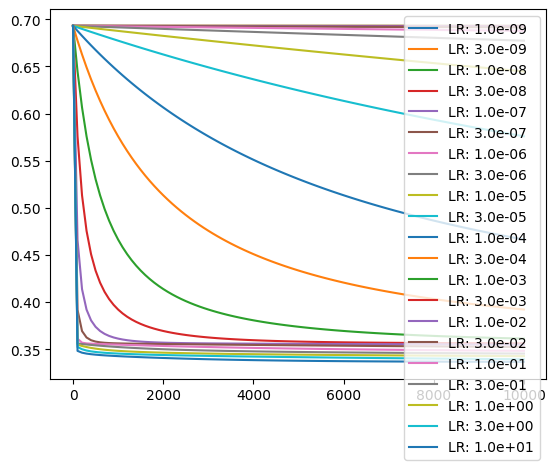

([array([-3.16073744e-06, -3.36599345e-06, -2.53612634e-06, -2.17934649e-06,
         -3.15696027e-06,  7.93107808e-07, -3.34057206e-06]),
  array([-9.48209431e-06, -1.00978613e-05, -7.60827971e-06, -6.53797808e-06,
         -9.47076184e-06,  2.37930093e-06, -1.00215962e-05]),
  array([-3.16056042e-05, -3.36581482e-05, -2.53597739e-05, -2.17925441e-05,
         -3.15678181e-05,  7.93074071e-06, -3.34039212e-05]),
  array([-9.48050127e-05, -1.00962537e-04, -7.60693935e-05, -6.53714940e-05,
         -9.46915586e-05,  2.37899732e-05, -1.00199769e-04]),
  array([-3.15879094e-04, -3.36402923e-04, -2.53448859e-04, -2.17833391e-04,
         -3.15499796e-04,  7.92736818e-05, -3.33859347e-04]),
  array([-0.00094646, -0.00100802, -0.00075936, -0.00065289, -0.00094531,
          0.0002376 , -0.00100038]),
  array([-0.00314117, -0.00334624, -0.00251966, -0.00216916, -0.00313723,
          0.00078938, -0.00332068]),
  array([-0.00930744, -0.00992159, -0.00746136, -0.00644704, -0.00929469,
         

In [78]:
learning_curve(norm_X_train, y_train, initial_W_set, initial_b, learning_rate, num_iters)

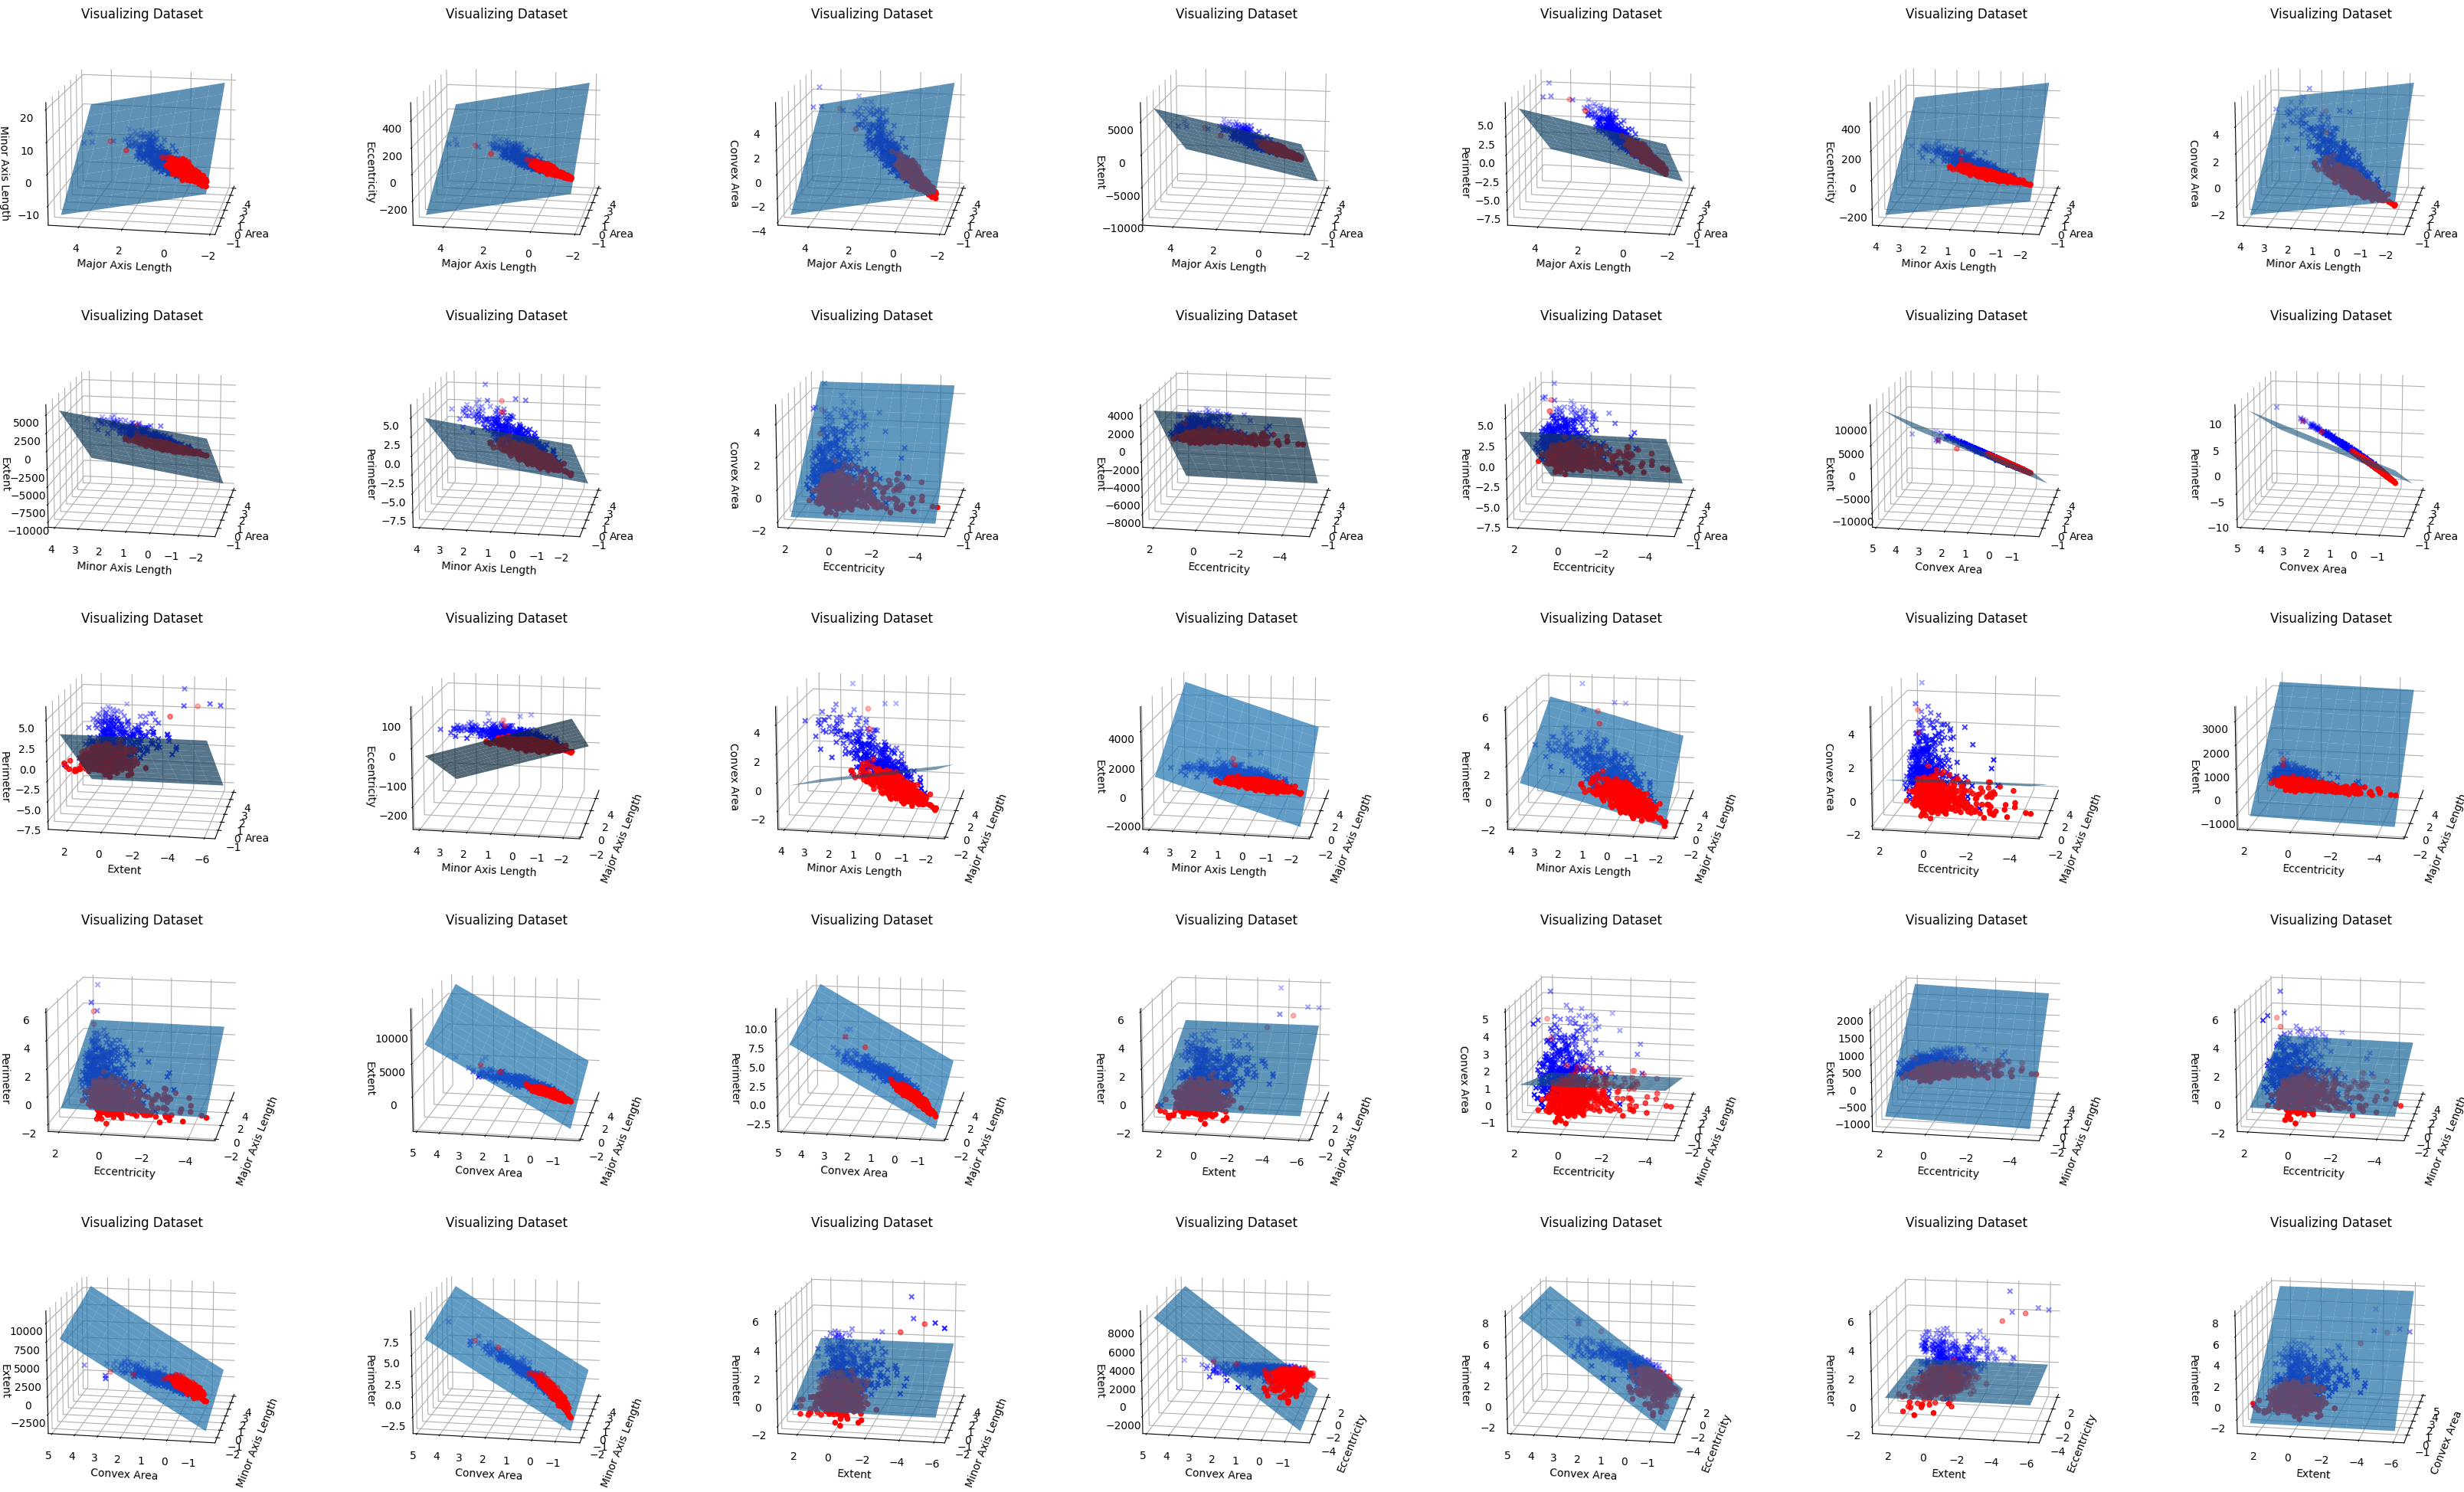

In [150]:
def plot_features_in_3D(X_matrix, y_set, final_W_set, final_b, feature_names):
    n = X_matrix.shape[1]

    transparent_color = (1.0, 1.0, 1.0, 0.0)
    combinations = list(itertools.combinations(np.arange(n), 3))

    rows = np.ceil(np.sqrt(len(combinations))).astype(int)
    columns = len(combinations) // rows
    fig = plt.figure(figsize = (n*rows, n*columns))

    class_1 = y_set == 1
    class_0 = y_set == 0

    for subplot_index, feature_indices in enumerate(combinations):
        subplot = fig.add_subplot(n, n, subplot_index + 1, projection = "3d")

        x_feature_index = feature_indices[0]
        y_feature_index = feature_indices[1]
        z_feature_index = feature_indices[2]

        subplot.xaxis.set_pane_color(transparent_color)
        subplot.yaxis.set_pane_color(transparent_color)
        subplot.zaxis.set_pane_color(transparent_color)
        
        subplot.set_xlabel(feature_names[x_feature_index])
        subplot.set_ylabel(feature_names[y_feature_index])
        subplot.set_zlabel(feature_names[z_feature_index])
        subplot.set_title("Visualizing Dataset")

        subplot.view_init(15, 190)

        subplot.scatter3D(X_matrix[:, x_feature_index][class_1], X_matrix[:, y_feature_index][class_1], X_matrix[:, z_feature_index][class_1], color = "r", marker = "o")
        subplot.scatter3D(X_matrix[:, x_feature_index][class_0], X_matrix[:, y_feature_index][class_0], X_matrix[:, z_feature_index][class_0], color = "b", marker = "x")

        x_range = np.linspace(np.min(X_matrix[:, x_feature_index]), np.max(X_matrix[:, x_feature_index]), 10)
        y_range = np.linspace(np.min(X_matrix[:, y_feature_index]), np.max(X_matrix[:, y_feature_index]), 10)
        X_surface, Y_surface = np.meshgrid(x_range, y_range)

        z_range = - (final_W_set[x_feature_index] * X_surface + final_W_set[y_feature_index] * Y_surface + final_b) / final_W_set[z_feature_index]

        subplot.plot_surface(X_surface, Y_surface, z_range, alpha = 0.7, antialiased = True)

    plt.show()

plot_features_in_3D(norm_X_train, y_train, final_W_set, final_b, features)

In [132]:
def logistic_regression_prediction(X_set, W_set, b):
    return logistic_regression_probability(X_set, W_set, b) >= 0.5

In [172]:
X_testing = z_score_normalization(testing[:, :-1])
y_testing = testing[:, -1]

predictions = np.zeros(y_testing.shape[0])
for testing_index, testing_example in enumerate(X_testing):
    predictions[testing_index] = logistic_regression_prediction(testing_example, final_W_set, final_b)

results = predictions == y_testing
print(f"Accuracy: {np.bincount(results)[1]/len(results)}")
print(predictions)

Accuracy: 0.46
[0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 1. 1.]
